In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import sklearn
import numpy as np

1. Загрузка файла

In [2]:
df=pd.read_csv('HR.csv')

In [3]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


2. среднее,медиана,мода,мин/макс,сред.отклонение

In [6]:
df.mean()

satisfaction_level         0.612834
last_evaluation            0.716102
number_project             3.803054
average_montly_hours     201.050337
time_spend_company         3.498233
Work_accident              0.144610
left                       0.238083
promotion_last_5years      0.021268
dtype: float64

In [5]:
df.median()

satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

In [7]:
df.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.min()

satisfaction_level       0.09
last_evaluation          0.36
number_project              2
average_montly_hours       96
time_spend_company          2
Work_accident               0
left                        0
promotion_last_5years       0
department                 IT
salary                   high
dtype: object

In [9]:
df.max()

satisfaction_level             1.0
last_evaluation                1.0
number_project                   7
average_montly_hours           310
time_spend_company              10
Work_accident                    1
left                             1
promotion_last_5years            1
department               technical
salary                      medium
dtype: object

In [10]:
df.std()

satisfaction_level        0.248631
last_evaluation           0.171169
number_project            1.232592
average_montly_hours     49.943099
time_spend_company        1.460136
Work_accident             0.351719
left                      0.425924
promotion_last_5years     0.144281
dtype: float64

3. Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.
Определите две самые скоррелированные и две наименее скоррелированные переменные.

In [14]:
corr=df.corr()

In [15]:
corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


([<matplotlib.axis.YTick at 0x7fb9586a0ee0>,
 [Text(0, 0, 'satisfaction_level'),
  Text(0, 1, 'last_evaluation'),
  Text(0, 2, 'number_project'),
  Text(0, 3, 'average_montly_hours'),
  Text(0, 4, 'time_spend_company'),
  Text(0, 5, 'Work_accident'),
  Text(0, 6, 'left'),
  Text(0, 7, 'promotion_last_5years')])

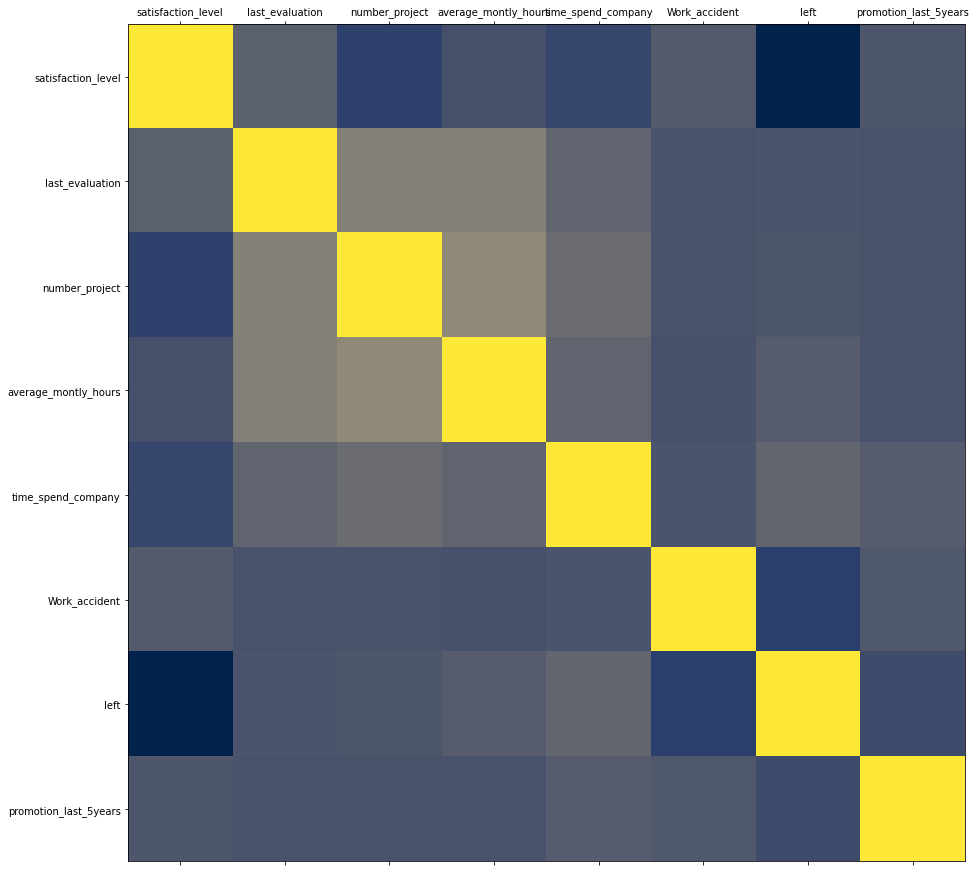

In [31]:
fig, ax = plt.subplots(figsize=(15, 17))
ax.matshow(corr, cmap='cividis')
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)

Две наиболее скоррелированных переменные: average_montly_hours и number_project
Две наименее скоррелированных переменные: left и satisfaction_level

4. Рассчитайте сколько сотрудников работает в каждом департаменте.

In [55]:
df.groupby(['department']).agg({'department':'count'}).rename(columns={'department':'Count'})

,Count
department,
IT,1227
RandD,787
accounting,767
hr,739
management,630
marketing,858
product_mng,902
sales,4140
support,2229


5. Показать распределение сотрудников по зарплатам.

<AxesSubplot:>

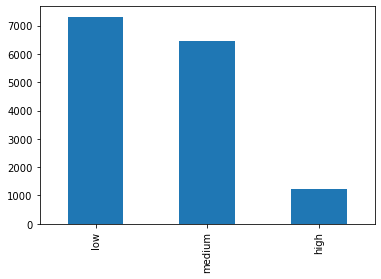

In [65]:
df['salary'].value_counts().plot.bar()

6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

array([[<AxesSubplot:title={'center':'IT'}>,
        <AxesSubplot:title={'center':'RandD'}>,
        <AxesSubplot:title={'center':'accounting'}>],
       [<AxesSubplot:title={'center':'hr'}>,
        <AxesSubplot:title={'center':'management'}>,
        <AxesSubplot:title={'center':'marketing'}>],
       [<AxesSubplot:title={'center':'product_mng'}>,
        <AxesSubplot:title={'center':'sales'}>,
        <AxesSubplot:title={'center':'support'}>],
       [<AxesSubplot:title={'center':'technical'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

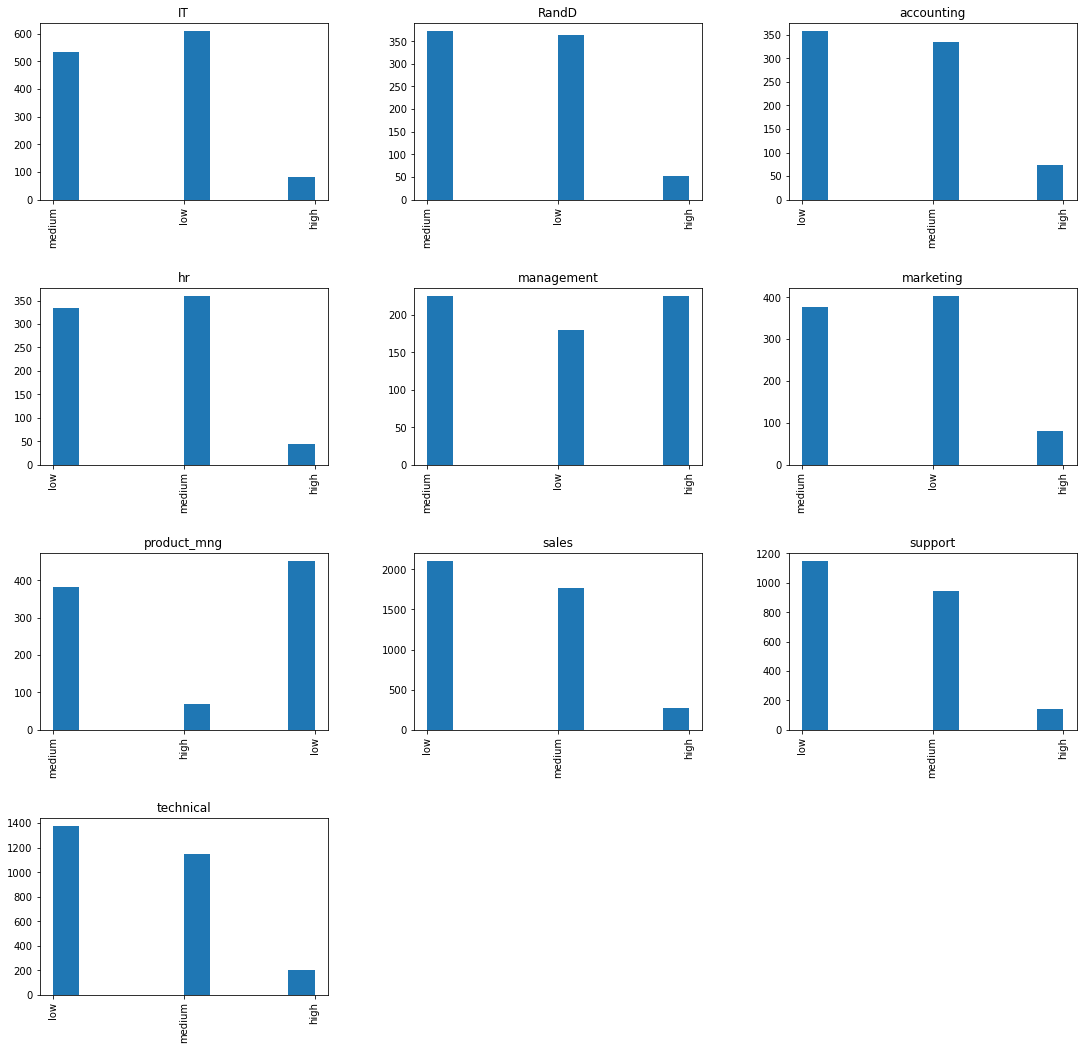

In [101]:
df['salary'].hist(by=df['department'], figsize=(18, 18))

7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [105]:
df[df['salary']=='high']['average_montly_hours'].std()

47.710445562322235

In [106]:
df[df['salary']=='low']['average_montly_hours'].std()

50.832214201477065

Стандартный независимый тест из двух выборок, предполагающий неравные дисперсии генеральной совокупности с 5% уровнем значимости

In [115]:
stats.ttest_ind(list(df[df['salary']=='high']['average_montly_hours']), list(df[df['salary']=='low']['average_montly_hours']), equal_var=False, alternative='greater')

Ttest_indResult(statistic=-0.7624331665385475, pvalue=0.7770477228871056)

Вывод: мы не можем принять гипотезу о том, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким оклад, так как p-value больше 5 % 

8. Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):

● Доля сотрудников с повышением за последние 5 лет

In [133]:
print('Уволились')
len(df[(df['left']==1) & (df['promotion_last_5years']==1)])/len(df[df['left']==1])

Уволились


0.005320638476617194

In [134]:
print('Не уволились')
len(df[(df['left']==0) & (df['promotion_last_5years']==1)])/len(df[df['left']==0])

Не уволились


0.026251312565628283

● Средняя степень удовлетворенности

In [135]:
print('Уволились')
df[df['left']==1]['satisfaction_level'].mean()

Уволились


0.44009801176140917

In [136]:
print('Не уволились')
df[df['left']==0]['satisfaction_level'].mean()

Не уволились


0.666809590479516

● Среднее количество проектов

In [140]:
print('Уволились')
df[df['left']==1]['number_project'].mean()

Уволились


3.8555026603192384

In [141]:
print('Не уволились')
df[df['left']==0]['number_project'].mean()

Не уволились


3.786664333216661

9. Разделить данные на тестовую и обучающую выборки Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary)
Оценить качество модели на тестовой выборки

In [22]:
df2=df.drop(columns=['department', 'salary'], inplace=False)

In [23]:
df2

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0
14995,0.37,0.48,2,160,3,0,1,0
14996,0.37,0.53,2,143,3,0,1,0
14997,0.11,0.96,6,280,4,0,1,0


In [45]:
X=df2[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']].values
y=df2['left'].values

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [47]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [48]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [49]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

C:\Users\ksebobrova\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [51]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: ', str(accuracy_score(y_test, y_pred)))

[[2145  154]
 [ 401  300]]
Accuracy:  0.815


Качество 0.815, что является достаточно хорошим показателем 